In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.ndimage import gaussian_filter
import tqdm
from joblib import Parallel, delayed
from markov_functions import *
from itertools import product
import warnings
import ast
from scipy.optimize import curve_fit

In [36]:
def plot_pitch(sequence_parent, sequence_to_find, axes, color='C1'):
    
    shorten_type = {
        'fastball': 'F',
        'offspeed': 'O',
        'breaking': 'B'
    }
    target_sequence = sequence_parent[sequence_parent['sequence_tuple'] == sequence_to_find]


    for idx, row in target_sequence.iterrows():
        
        coord_sequence = ast.literal_eval(row['pitch_coord_sequence'])
        
        x_seq = [coord[0] for coord in coord_sequence]
        y_seq = [coord[1] for coord in coord_sequence]
        
        # Plot individual sequence
        if shorten_type[sequence_to_find[0]] == 'F':
            ax = axes[0]
        elif shorten_type[sequence_to_find[0]] == 'O':
            ax = axes[1]
        else:
            ax = axes[2]
        ax.plot(x_seq[0], y_seq[0], marker='o', linestyle='-', alpha=0.2, color=color)

    for i in range(3):
        ax = axes[i]
        plotting_background(ax)

        ax.set_xlim(-35, 35)
        ax.set_ylim(-40, 40)
    

Good endings count: 34
Bad endings count: 16


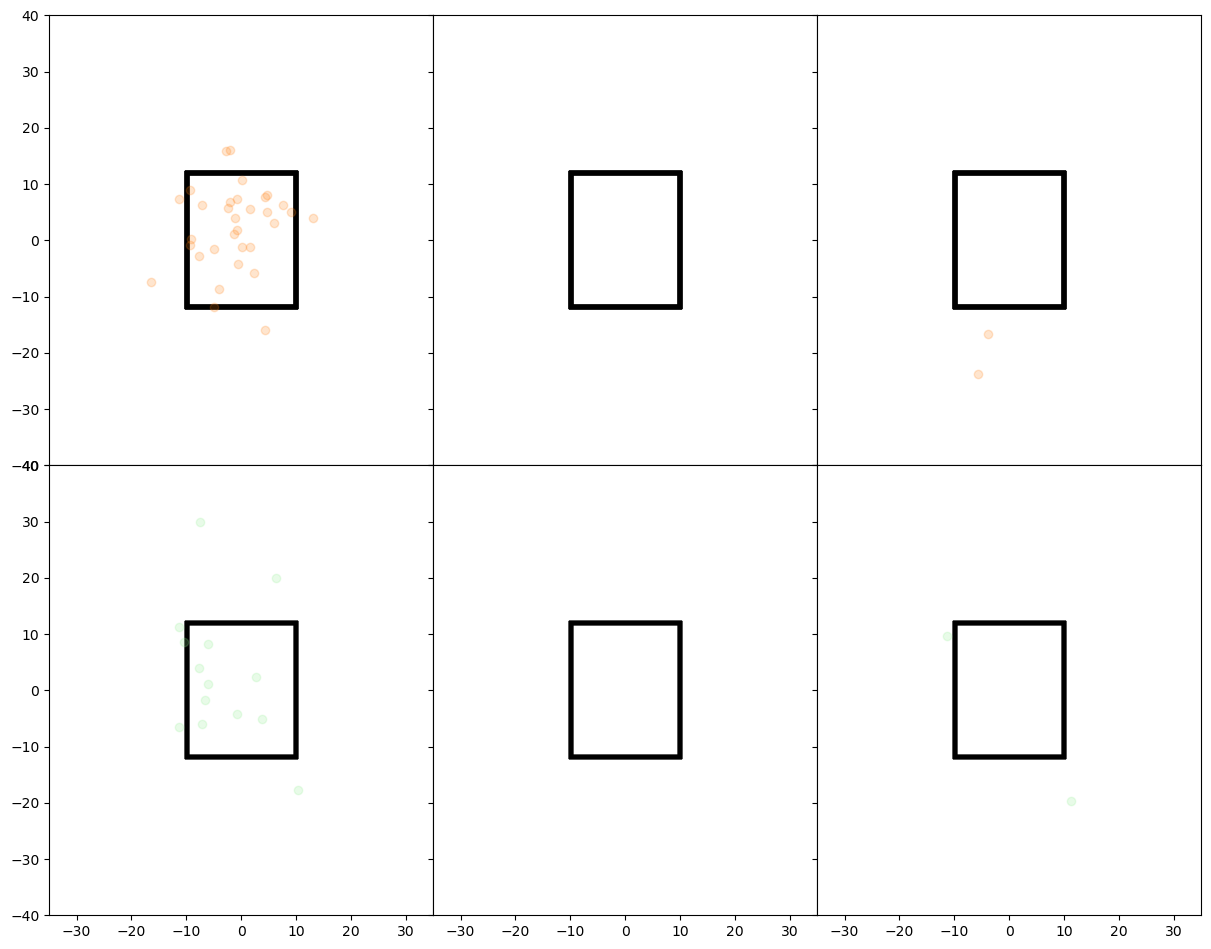

In [38]:
pitcher  = '古林睿煬'
batter   = '魔鷹'
opposite_hand = False

store_result = f'temp_{pitcher}_{batter}.csv'

# Load the simulation results
results_df = pd.read_csv(store_result)


# The sequences are stored as strings, so we need to convert them back to lists
# using ast.literal_eval. This is safer than using eval().
results_df['pitch_types_sequence'] = results_df['pitch_types_sequence'].apply(ast.literal_eval)

# Filter for sequences with a minimum length of 3
min_pitch_len = 0
filtered_df = results_df[results_df['pitch_types_sequence'].apply(len) >= min_pitch_len].copy()

# Convert the list of pitch types to a tuple so it can be used for grouping/counting
# Tuples are hashable, while lists are not.
filtered_df['sequence_tuple'] = filtered_df['pitch_types_sequence'].apply(tuple)

# Separate the data into good and bad endings
good_endings_df = filtered_df[filtered_df['good_ending'] == True]
bad_endings_df = filtered_df[filtered_df['good_ending'] == False]

print(f"Good endings count: {len(good_endings_df)}")
print(f"Bad endings count: {len(bad_endings_df)}")

# Count the occurrences of each sequence for both outcomes
good_sequence_rank = good_endings_df['sequence_tuple'].value_counts().reset_index()
good_sequence_rank.columns = ['Pitch Sequence', 'Frequency']

bad_sequence_rank = bad_endings_df['sequence_tuple'].value_counts().reset_index()
bad_sequence_rank.columns = ['Pitch Sequence', 'Frequency']


fig, axes = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.0, wspace=0.0, top=0.95, bottom=0.05, left=0.03, right=0.99)
for i in range(len(good_sequence_rank['Pitch Sequence'])):
    ax = axes[0, :]
    sequence_to_find = good_sequence_rank['Pitch Sequence'][i]
    plot_pitch(good_endings_df, sequence_to_find, axes=ax, color='C1')
    

for i in range(len(bad_sequence_rank['Pitch Sequence'])):
    ax = axes[1, :]
    sequence_to_find = bad_sequence_rank['Pitch Sequence'][i]
    plot_pitch(bad_endings_df, sequence_to_find, axes=ax, color='lightgreen')

plt.show()
plt.close('all')


